AmirReza Azari </br>
99101087

<font color="yellowgreen">
    Question 1 (35 points): </br>
    Implement Canny Edge Detection from scratch and apply that on Lena.png
    image. The below steps must be followed in your code.

    1. Gray scale conversion
    2. Noise reduction
    3. Gradient calculation
    4. Non-maximum suppression
    5. Double Thresholding and hysteresis </br>
    (You must Define a function and plot the output for each step)
</font>


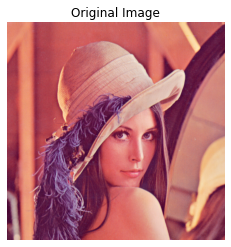

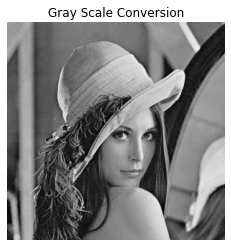

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_image = cv2.imread("Lena.png")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Scale Conversion')
plt.axis('off')
plt.show()


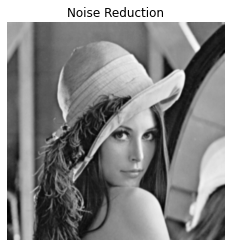

In [2]:
kernel_size = 5
blurred_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)
plt.imshow(blurred_image, cmap='gray')
plt.title('Noise Reduction')
plt.axis('off')
plt.show()

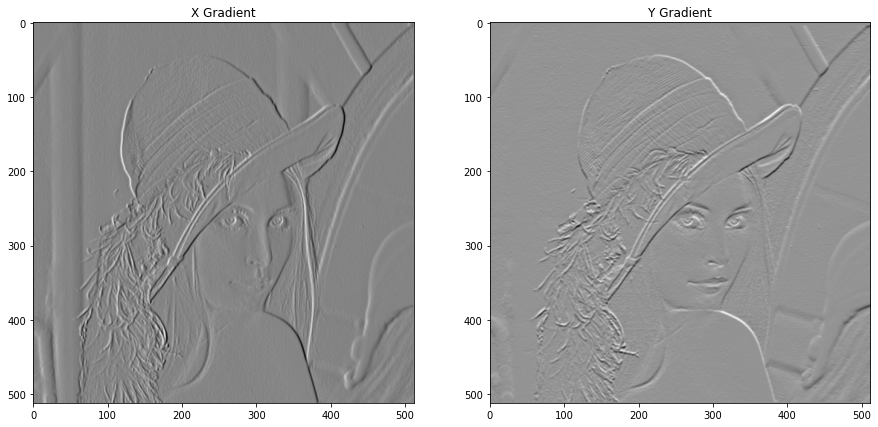

In [3]:
x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, 3)
y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, 3)

magnitude = np.sqrt(x**2 + y**2)
angle = np.arctan2(y, x) * (180 / np.pi)

plt.figure(figsize=(15, 12))

plt.subplot(1, 2, 1)
plt.imshow(x, cmap='gray')
plt.title('X Gradient')

plt.subplot(1, 2, 2)
plt.imshow(y, cmap='gray')
plt.title('Y Gradient')

plt.show()

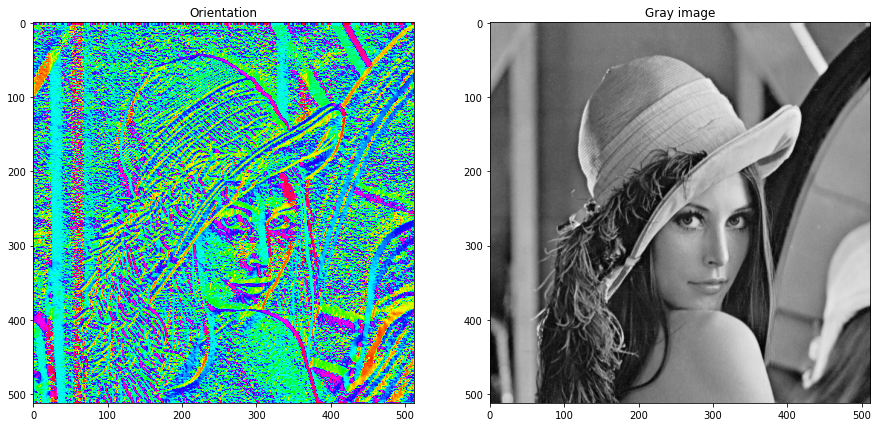

In [4]:
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.imshow(angle, cmap='hsv', interpolation='bilinear')
plt.title('Orientation')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray image')
plt.show()

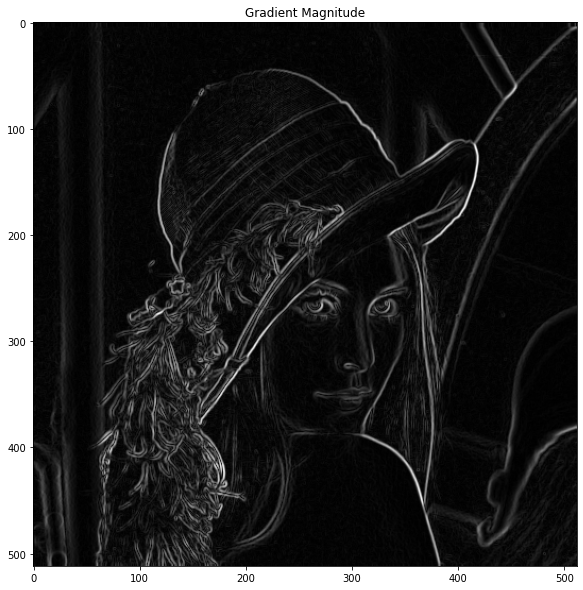

In [5]:
plt.figure(figsize=(12, 10))
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.show()

<font color="lightblue">
    Define Functions for  Gray scale conversion, Noise reduction, Gradient calculation:
</font>

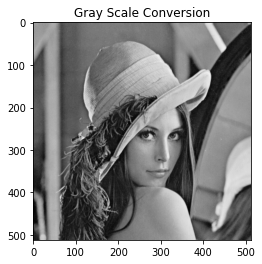

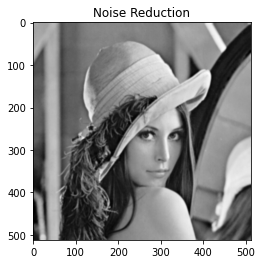

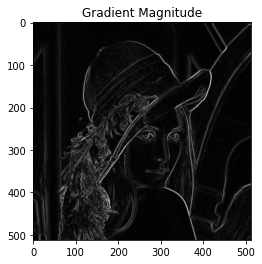

In [6]:
def gray_scale(path):
    original_image = cv2.imread(path)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Gray Scale Conversion')
    plt.show()
    
    
def noise_reduction(path):
    gray_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Noise Reduction')
    plt.show()
    
def calculate_gradients(path):
    gray_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(x**2 + y**2)
    angle = np.arctan2(y, x) * (180 / np.pi)
    plt.imshow(magnitude, cmap='gray')
    plt.title('Gradient Magnitude')
    plt.show()
    
path = "Lena.png"
gray_scale(path)
noise_reduction(path)
calculate_gradients(path)

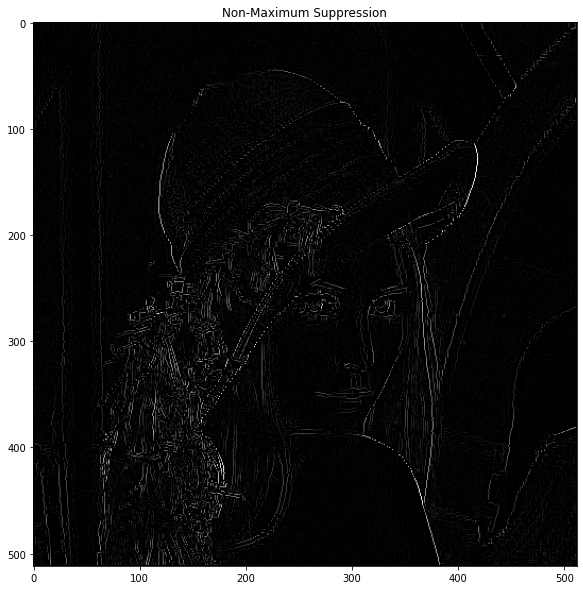

In [7]:
def non_maximum_suppression(path):
    gray_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    angle = (np.arctan2(y, x) * (180 / np.pi)) % 180
    magnitude = np.sqrt(x ** 2 + y ** 2)

    supression = np.zeros_like(magnitude)

    for i in range(magnitude.shape[0]-2):
        for j in range(magnitude.shape[1]-2):
            current_angle = angle[i + 1, j + 1]
            current_magnitude = magnitude[i + 1, j + 1]
            if (0 <= current_angle < 22.5) or (157.5 <= current_angle <= 180):
                h1 = magnitude[i + 1, j + 2]
                h2 = magnitude[i + 1, j]
            elif (22.5 <= current_angle < 67.5):
                h1 = magnitude[i + 2, j]
                h2 = magnitude[i, j + 2]
            elif (67.5 <= current_angle < 112.5):
                h1 = magnitude[i + 2, j + 1]
                h2 = magnitude[i, j + 1]
            else:
                h1 = magnitude[i, j]
                h2 = magnitude[i + 2, j + 2]
            if current_magnitude >= h1 and current_magnitude >= h2:
                supression[i + 1, j + 1] = current_magnitude

    plt.figure(figsize=(12, 10))
    plt.imshow(supression, cmap='gray')
    plt.title('Non-Maximum Suppression')
    plt.show()


non_maximum_suppression(path)

<font color="lightblue">Now we write all 5 functions together to implement canny edge detector:</font>

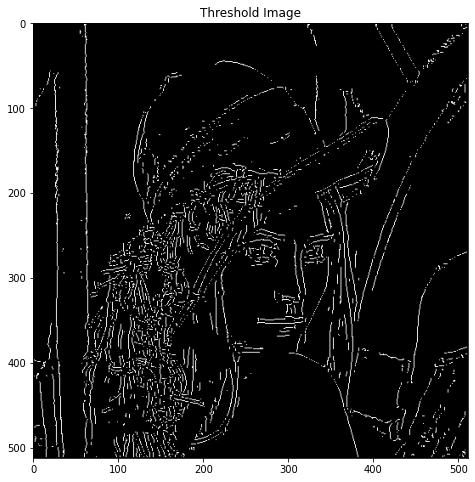

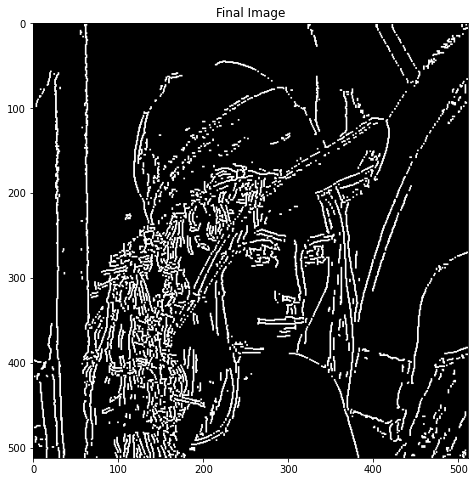

In [8]:
def gaussian_blur(img):
    return cv2.GaussianBlur(img, (7, 7), 0)


def calculate_gradients(gray_image):
    x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    angle = np.arctan2(y, x) * (180 / np.pi)
    magnitude = np.sqrt(x ** 2 + y ** 2)
    return magnitude, angle


def non_maximum_suppression(magnitude, angle):
    supression = np.zeros_like(magnitude)
    angle = angle % 180
    for i in range(magnitude.shape[0] - 2):
        for j in range(magnitude.shape[1] - 2):
            current_angle = angle[i + 1, j + 1]
            current_magnitude = magnitude[i + 1, j + 1]
            if (0 <= current_angle < 22.5) or (157.5 <= current_angle <= 180):
                h1 = magnitude[i + 1, j + 2]
                h2 = magnitude[i + 1, j]
            elif (22.5 <= current_angle < 67.5):
                h1 = magnitude[i + 2, j]
                h2 = magnitude[i, j + 2]
            elif (67.5 <= current_angle < 112.5):
                h1 = magnitude[i + 2, j + 1]
                h2 = magnitude[i, j + 1]
            else:
                h1 = magnitude[i, j]
                h2 = magnitude[i + 2, j + 2]
            if current_magnitude >= h1 and current_magnitude >= h2:
                supression[i + 1, j + 1] = current_magnitude
    return supression


def double_threshold(image):
    high_thresh = image.max() * 0.1
    low_thresh = high_thresh * 0.03

    result = np.zeros_like(image)
    strong = 255
    weak = 25

    strong_i, strong_j = np.where(image >= high_thresh)
    weak_i, weak_j = np.where((image >= low_thresh) & (image < high_thresh))

    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak

    return result, weak, strong


def hysteresis(image, weak):
    M, N = image.shape
    for i in range(M - 2):
        for j in range(N - 2):
            if image[i + 1, j + 1] == weak:
                if (image[i + 2, j:j + 3].any() == 255 or
                        image[i, j:j + 3].any() == 255 or
                        image[i + 1, [j, j + 2]].any() == 255):
                    image[i + 1, j + 1] = 255
                else:
                    image[i + 1, j + 1] = 0
    return image


def canny_edge_detector(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    blurred = gaussian_blur(image)

    magnitude, angle = calculate_gradients(blurred)

    non_max_suppression_image = non_maximum_suppression(magnitude, angle)

    threshold_img, weak, _ = double_threshold(non_max_suppression_image)

    final_image = hysteresis(threshold_img, weak)

    kernel = np.ones((2, 2), np.uint8)
    final_image = cv2.dilate(final_image, kernel, iterations=1)
    
    return threshold_img, final_image


threshold_img, final_image = canny_edge_detector(path)

plt.figure(figsize=(12, 8))
plt.imshow(threshold_img, cmap='gray')
plt.title('Threshold Image')
plt.show()
plt.figure(figsize=(12, 8))
plt.imshow(final_image, cmap='gray')
plt.title('Final Image')
plt.show()

<font color="yellowgreen">
    Question 2 (35 points): <br>
    First Implement Harris key point detector from scratch and apply that on
Harris.png (Slide 91). Second implement Harris using OpenCV and compare
the results.
</font>

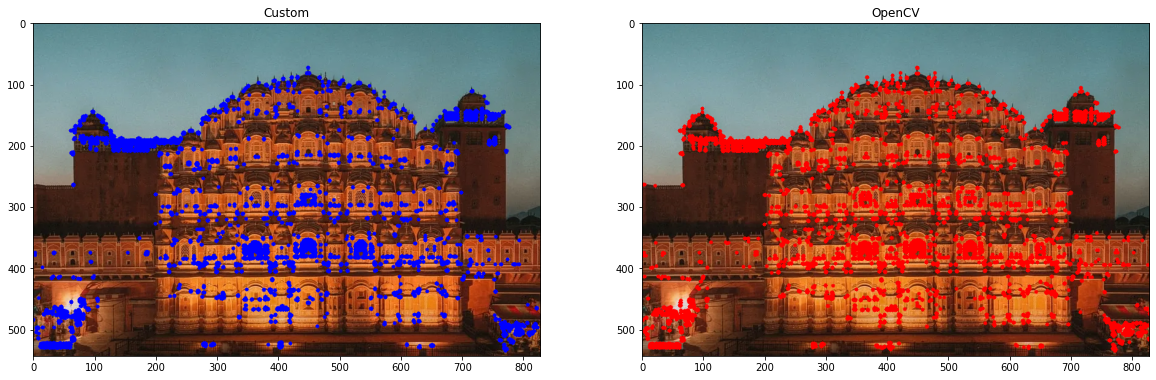

In [9]:
def harris_detector(gray, k, window, threshold):
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    S_xx = cv2.boxFilter(Ix * Ix, -1, (window, window))
    S_yy = cv2.boxFilter(Iy * Iy, -1, (window, window))
    S_xy = cv2.boxFilter(Ix * Iy, -1, (window, window))

    determinant = (S_xx * S_yy) - (S_xy ** 2)
    trace = S_xx + S_yy

    answer = determinant - k * (trace ** 2)

    return np.argwhere(answer > threshold * answer.max())


image = cv2.imread('Harris.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)
manual_keypoints = harris_detector(gray, 0.04, 3, 0.031)
scratch_image = image.copy()
for keypoint in manual_keypoints:
    cv2.circle(scratch_image, tuple(keypoint[::-1]), 3, (255, 0, 0), -1)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
threshold = 0.01 * dst.max()
opencv_keypoints = np.argwhere(dst > threshold)
opencv_image = image.copy()
for keypoint in opencv_keypoints:
    cv2.circle(opencv_image, tuple(keypoint[::-1]), 3, (0, 0, 255), -1)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(scratch_image, cv2.COLOR_BGR2RGB))
plt.title('Custom')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB))
plt.title('OpenCV')
plt.show()


<font color='lightblue'>
    Let's compare them:
</font>

In [10]:
print(f"Custom Implementation: {len(manual_keypoints)} keypoints")
print(f"OpenCV Implementation: {len(opencv_keypoints)} keypoints")

Custom Implementation: 6249 keypoints
OpenCV Implementation: 5707 keypoints


In [11]:
image = cv2.imread('Harris.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)
manual_keypoints = harris_detector(gray, 0.04, 3, 0.035)
print(f"Custom Implementation: {len(manual_keypoints)} keypoints")

Custom Implementation: 5368 keypoints


In [12]:
image = cv2.imread('Harris.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)
manual_keypoints = harris_detector(gray, 0.02, 3, 0.031)
print(f"Custom Implementation: {len(manual_keypoints)} keypoints")

Custom Implementation: 6821 keypoints


In [13]:
image = cv2.imread('Harris.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)
manual_keypoints = harris_detector(gray, 0.04, 4, 0.031)
print(f"Custom Implementation: {len(manual_keypoints)} keypoints")

Custom Implementation: 12842 keypoints


In [14]:
manual_keypoints = harris_detector(gray, 0.04, 5, 0.031)
print(f"Custom Implementation: {len(manual_keypoints)} keypoints")

Custom Implementation: 18015 keypoints


<font color="lightgreen">
    They generally have similar results with slight difference.<br>
    The custom implementation detected 6249 keypoints, and the OpenCV implementation detected 5707 keypoints.<br>
    The difference in the number of keypoints arise from details, for example with threshold=0.031 we detect 6249 keypoints but with threshold=0.035 we detect 5368 keypoints.<br>
    Or with k = 0.04 we detect 6249 keypoints, but with k = 0.2 we detect 6821 keypoints.<br>
    Look at the effect of size of window!
</font>

<font color="yellowgreen">
    Question 3 (30 points): <br>
     Perform Maximally Stable Extremal Region (MSER) algorithm on img3.jpg.
Find the best hyperparameters to detect all smallest blobs (6 blobs similar to
img3_output.jpg). Feel free to use opencv library . You should report the
final hyperparameters.
</font>

In [15]:
def mser(delta, min_area, max_area, plot):
    image = cv2.imread('img3.jpg')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    mser = cv2.MSER_create(delta=delta, min_area=min_area, max_area=max_area)
    regions, nums = mser.detectRegions(gray)
    final_image = image.copy()
    for region in regions:
        a, b, c, d = cv2.boundingRect(region)
        if d / c > 1.5:
            continue
        cv2.rectangle(final_image, (a, b), (a + c, b + d), (127, 0, 127), 2)

    if plot:
        res = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(15, 15))
        plt.imshow(res)
        plt.show()

    return len(regions)


def find_best_hyperparameters(start, end, step, min_start, min_end, min_step,
                              max_start, max_end, max_step):
    best = None
    best_hyperparameters = None

    for val in range(start, end, step):
        for i in range(min_start, min_end, min_step):
            for j in range(max_start, max_end, max_step):
                result = mser(val, i, j, False)
                if best is None or result > best:
                    best = result
                    best_hyperparameters = (val, i, j)

    return best_hyperparameters


start, end, steps = 25, 35, 2

min_start = 2500
min_end = 3000
min_step = 100

max_start = 5500
max_end = 6700
max_step = 500

best_hyperparameters = find_best_hyperparameters(start, end, steps, min_start, min_end,
                                                 min_step, max_start, max_end, max_step)

print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: (25, 2500, 5500)


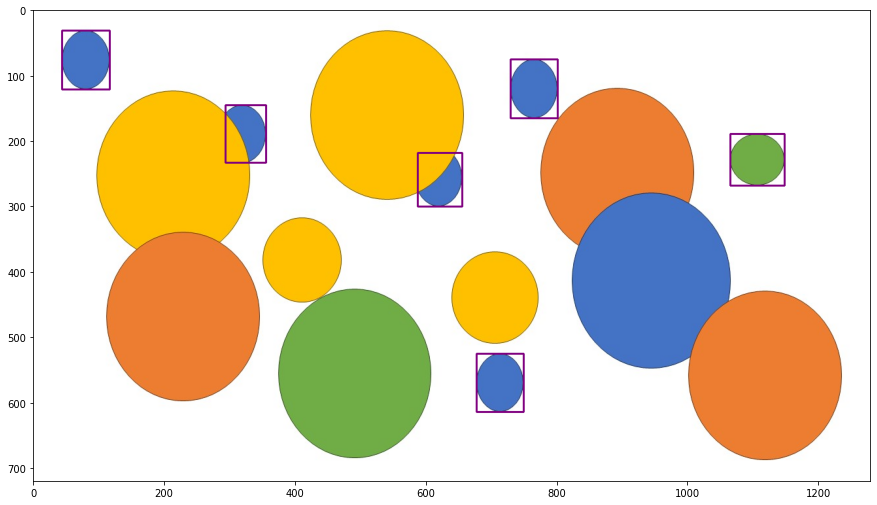

In [16]:
delta, min_area, max_area = best_hyperparameters
a = mser(delta, min_area, max_area, True)

<font color="yellowgreen">
    Question 4 (Extra 20 points): <br>
    Use SIFT features to match the template.jpg to img4.jpg. Your final results
should be same as img4_output.jpg. You can use opencv library.
</font>

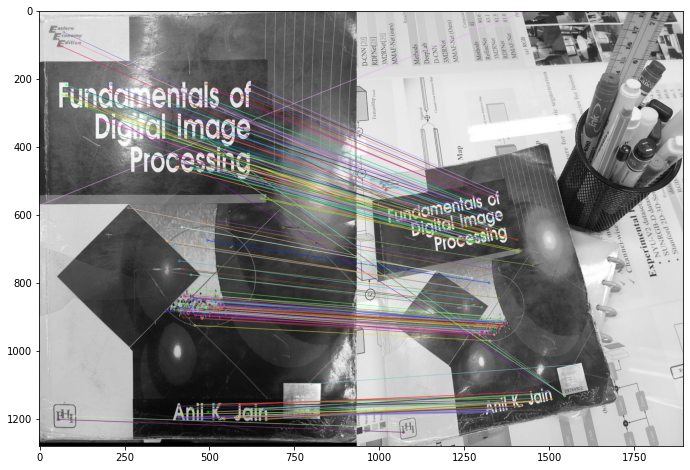

In [17]:
sift = cv2.SIFT_create()

image1 = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)
kp1, desc1 = sift.detectAndCompute(image1, None)

image2 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
kp2, desc2 = sift.detectAndCompute(image2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)

goods = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        goods.append([m])

image3 = cv2.drawMatchesKnn(image1, kp1, image2, kp2, goods, None,
                            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 8))
plt.imshow(image3)
plt.show()

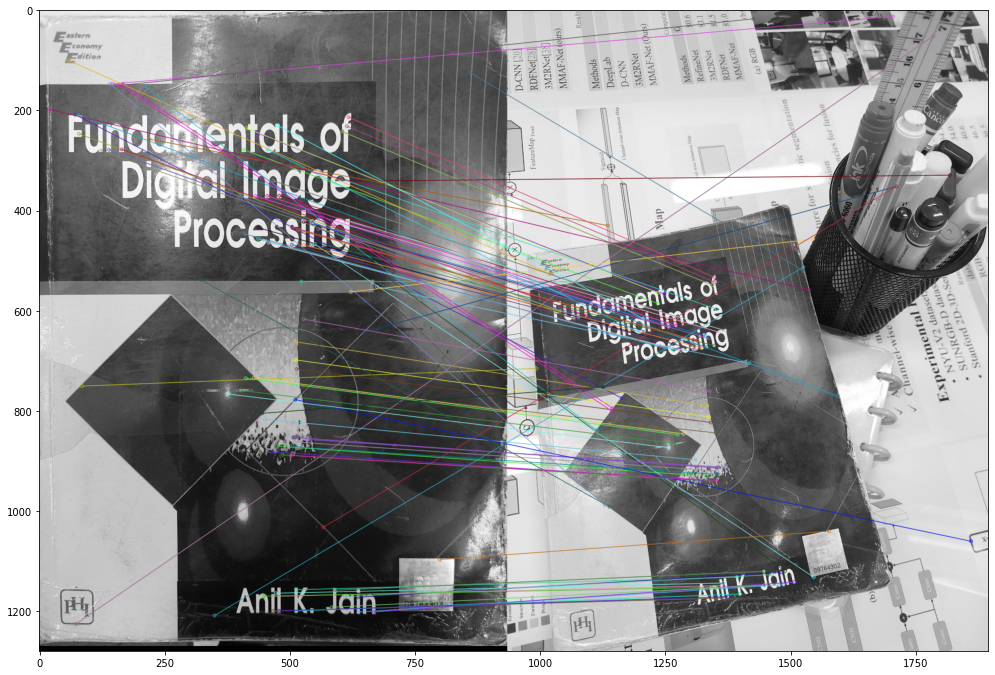

In [18]:
sift = cv2.SIFT_create()

image1 = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)
kp1, desc1 = sift.detectAndCompute(image1, None)

image2 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
kp2, desc2 = sift.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)

image3 = cv2.drawMatches(image1, kp1, image2, kp2, matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(17, 13))
plt.imshow(image3)
plt.show()